# 深度学习 实验2

本节课我们仍然使用上节课的线性模型，了解模型的过拟合与损失函数中的正则项。

## Task 1

读取数据文件 `train_data.csv` 和 `test_data.csv`，文件中列为 `label` 的表示标签，1 表示正例，0 表示负例，其余列为 $x$，取值均为 0 或 1。使用 `train_data.csv` 训练你的模型，并用 `test_data.csv` 进行测试。

模型仍使用上节课的线性模型

$$
\hat y_i=f(x_i)=w\cdot x_i+b
$$

请分别绘制出训练集上的损失与测试集上的损失随迭代次数变化的曲线。

$$
Loss=\frac{1}{n}\sum_{i=1}^n (f(x_i)-y_i)^2
$$

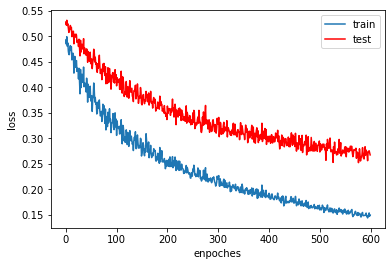

In [2]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
def loss(w,b,x,y,dim):
    error=0
    for i in range(dim):
        y_hat=np.dot(x[i],w)+b
        error+=(y_hat-y[i])**2
    return error/dim
    
#读数
train_data = pd.read_csv('train_data.csv')
train_data=train_data.values[0:596,:]
x=np.array(train_data[:,0:100])
y=np.array(train_data[:,100])
test_data = pd.read_csv('test_data.csv')
test_data=test_data.values[0:255,:]
x_test=np.array(test_data[:,0:100])
y_test=np.array(test_data[:,100])


#初始化参数

eta=0.001
dim1=595
dim2=254
xdim=100
ydim=1
NUM=600

loss_train=[]
loss_test=[]
x_axis=[]
for enpoches in range(NUM):
    w=np.zeros(xdim)
    b=np.zeros(ydim)
    for enpoch in range(1,enpoches+2):
        i=random.randint(0,dim1-1)
        y_hat=np.dot(x[i],w)+b
        error=y_hat-y[i]
        delta_w=error*x[i]
        delta_b=error
        w=w-delta_w*eta
        b=b-delta_b*eta
    lossx=loss(w,b,x,y,dim1)
    loss_train.append(lossx)
    lossx=loss(w,b,x_test,y_test,dim2)
    loss_test.append(lossx)
    x_axis.append(enpoches)
plt.plot(x_axis,loss_train,label='train')
plt.plot(x_axis,loss_test,'r',label='test')
plt.xlabel('enpoches')
plt.ylabel('loss')
plt.legend()
plt.show()

## Task 2

不出意外，你会发现在 Task 1 中测试集上的损失明显大于训练集上的损失，这说明我们的模型出现了过拟合，下面我们在模型的损失函数中添加“正则项”

$$
Loss=\frac{1}{n}\sum_{i=1}^n (f(x_i)-y_i)^2+\alpha ||w||^2
$$

仍然可以使用随机梯度下降法，请自行推导迭代中需要的公式，并用上述损失函数重新训练与测试模型。

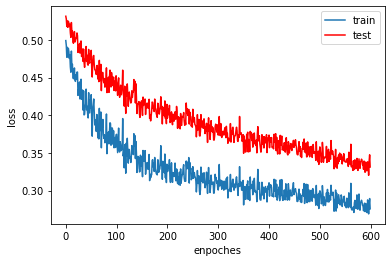

In [115]:
loss_train=[]
loss_test=[]
x_axis=[]
for enpoches in range(NUM):
    w=np.zeros(xdim)
    b=np.zeros(ydim)
    for enpoch in range(1,enpoches+2):
        i=random.randint(0,dim1-1)
        y_hat=np.dot(x[i],w)+b
        error=y_hat-y[i]
        delta_w=error*x[i]+10*w
        delta_b=error
        w=w-delta_w*eta
        b=b-delta_b*eta
    lossx=loss(w,b,x,y,dim1)
    loss_train.append(lossx)
    lossx=loss(w,b,x_test,y_test,dim2)
    loss_test.append(lossx)
    x_axis.append(enpoches)
plt.plot(x_axis,loss_train,label='train')
plt.plot(x_axis,loss_test,'r',label='test')
plt.xlabel('enpoches')
plt.ylabel('loss')
plt.legend()
plt.show()

## Task 3

尝试使用不同的参数 $\alpha$ 进行测试，试分析损失函数中的正则项对模型效果的影响。

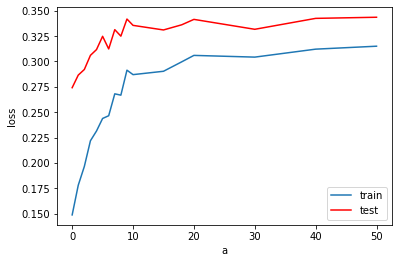

In [119]:
a_list=[0,1,2,3,4,5,6,7,8,9,10,15,18,20,30,40,50]
loss_train=[]
loss_test=[]
for a in a_list:
    w=np.zeros(xdim)
    b=np.zeros(ydim)
    for enpoch in range(NUM):
        i=random.randint(0,dim1-1)
        y_hat=np.dot(x[i],w)+b
        error=y_hat-y[i]
        delta_w=error*x[i]+a*w
        delta_b=error
        w=w-delta_w*eta
        b=b-delta_b*eta
    lossx=loss(w,b,x,y,dim1)
    loss_train.append(lossx)
    lossx=loss(w,b,x_test,y_test,dim2)
    loss_test.append(lossx)
plt.plot(a_list,loss_train,label='train')
plt.plot(a_list,loss_test,'r',label='test')
plt.xlabel('a')
plt.ylabel('loss')
plt.legend()
plt.show()


从图中的曲线可知，随着a的值增大，训练集和测试集的损失值都会变大，但是模型的鲁棒性变强。